# Problem statment : Build a classifer that can predict if claims will end in litigation

#### 1. Load data
#### 2. Data Exploration
#### 3. Data cleaning


In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [280]:
#Read dataset and load it into a dataframe
data_1 = pd.read_csv("Data\Assembled_Workers__Compensation_Claims___Beginning_2000.csv")
data.shape

(3383252, 14)

In [3]:
#Print all the attributes, this helps us to get a feel for what unimportnat attributes are ex: claim identifier is just ID
data.columns

Index(['Claim Identifier', 'Claim Type', 'District Name',
       'Average Weekly Wage', 'Current Claim Status', 'Claim Injury Type',
       'Age at Injury', 'Assembly Date', 'Accident Date', 'ANCR Date',
       'Controverted Date', 'Section 32 Date', 'PPD Scheduled Loss Date',
       'PPD Non-Scheduled Loss Date', 'PTD Date', 'First Appeal Date',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'OIICS Part Of Body Code', 'OIICS Part Of Body Description',
       'OIICS Nature of Injury Code', 'OIICS Nature of Injury Description',
       'OIICS Injury Source Code', 'OIICS Injury Source Description',
       'OIICS Event Exposure Code', 'OIICS Event Exposure Description',
       'OIICS Secondary Source Code', 'OIICS Secondary Source Description',
       'Alternative Dispute Resolution', 'Gender', 'Birth Year', 'Zip Code',


## Explore data before getting data quality report

### See what percent of data is missing  

In [4]:
perecent_missing = (data.isnull().sum()/data.shape[0])*100
perecent_missing = perecent_missing.reset_index()
#perecent_missing[perecent_missing>0].plot(kind='bar')

#precent_missing.plot(kind = 'bar')
#we see columns with missing values are mostly date, except nature of body rest can be dropped because it is mostly date an event
# that might mostly have no bearing on hiring an attorney

In [292]:
(data_1.isnull().sum()/data.shape[0])*100

Claim Identifier                        0.000000
Claim Type                              0.000000
District Name                           0.000000
Average Weekly Wage                     0.000000
Current Claim Status                    0.000000
Claim Injury Type                       0.000000
Age at Injury                           0.000000
Assembly Date                           0.000000
Accident Date                           0.485953
ANCR Date                              40.907121
Controverted Date                      91.559009
Section 32 Date                        95.988948
PPD Scheduled Loss Date                88.102512
PPD Non-Scheduled Loss Date            98.099521
PTD Date                              100.590438
First Appeal Date                      96.471324
WCIO Part Of Body Code                  0.000000
WCIO Part Of Body Description           0.000000
WCIO Nature of Injury Code              0.000000
WCIO Nature of Injury Description       0.000000
WCIO Cause of Injury

In [5]:
perecent_missing = perecent_missing[perecent_missing[0] >50.0]
perecent_missing.count()

index    20
0        20
dtype: int64

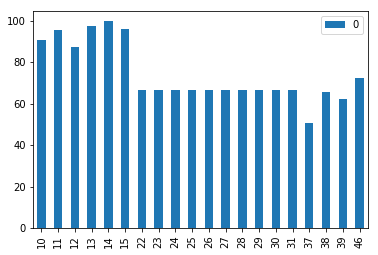

In [6]:
perecent_missing[perecent_missing > 50].plot(kind = 'bar')

In [8]:
#perecent_missing = perecent_missing.reset_index()
valid_columns = data.columns[~data.columns.isin(perecent_missing['index'])]

In [9]:
 valid_columns

Index(['Claim Identifier', 'Claim Type', 'District Name',
       'Average Weekly Wage', 'Current Claim Status', 'Claim Injury Type',
       'Age at Injury', 'Assembly Date', 'Accident Date', 'ANCR Date',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'Alternative Dispute Resolution', 'Gender', 'Birth Year', 'Zip Code',
       'Medical Fee Region', 'Highest Process', 'Hearing Count',
       'Closed Count', 'Attorney/Representative', 'Carrier Name',
       'Carrier Type', 'Interval Assembled to ANCR', 'Accident',
       'Occupational Disease', 'County of Injury'],
      dtype='object')

In [10]:
data.head(2)

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Hearing Count,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury
0,4037088,Workers Compensation,BUFFALO,610.00,HEARING UNSET,PPD NSL,37,06/30/2015,05/14/2015,10/29/2015,...,11,5,Y,UTICA MUTUAL INSURANCE CO,1A. PRIVATE,9.0,121.0,Y,N,ERIE
1,4039191,Workers Compensation,ALBANY,215.88,NO FURTHER ACTION,PPD NSL,70,07/10/2015,07/01/2015,11/12/2015,...,6,4,Y,STATE INSURANCE FUND,2A. SIF,8.0,125.0,Y,N,ALBANY


### invalid columns 

In [38]:
invalid_list = ['Claim Type','Claim Identifier','Hearing Count','Highest Process','Current Claim Status','Assembly Date','ANCR Date','Alternative Dispute Resolution','Closed Count']

In [39]:
valid_columns =valid_columns[~(valid_columns.isin(invalid_list))]

In [269]:
data['Claim Injury Type'].value_counts()

NON-COMP        1129837
TEMPORARY        917216
MED ONLY         568193
PPD SCH LOSS     437485
UNKNOWN          234574
PPD NSL           88476
CANCELLED         21643
DEATH              5804
PTD                4382
Name: Claim Injury Type, dtype: int64

In [13]:
#data[data['Claim Injury Type']['Attorney/Representative']].value_counts()

#### Cardnilaity is more than it should be, 112 for age doesn't sound right 

In [11]:
data = data[data['Claim Type'] == 'Workers Compensation']

In [12]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], infer_datetime_format=True)

In [13]:
data['Accident Date year'] = data['Accident Date'].dt.to_period('Y') 

In [14]:
data['Accident Date year'].head()

0   2015
1   2015
2   2015
3   2015
4   2015
Name: Accident Date year, dtype: object

In [245]:
data['Birth Years'].head()

0   1970
1   1970
2   1970
3   1970
4   1970
Name: Birth Years, dtype: object

In [ ]:
data['Birth Year'] = pd.to_datetime(data['Birth Year'])

In [15]:
data['Birth Year'] = pd.to_datetime(data['Birth Year'])

In [16]:
data['Birth Years'] = data['Birth Year'].dt.to_period('Y') 

In [17]:
data['injury age'] = data['Accident Date year'] - data['Birth Years']

In [18]:
data['injury age'] = data['injury age'].astype('int64')

In [19]:
data['injury age'] = data['injury age'].fillna(0)

In [20]:
data.loc[data['injury age'] <=16 ,'injury age'] = data['injury age'].median()

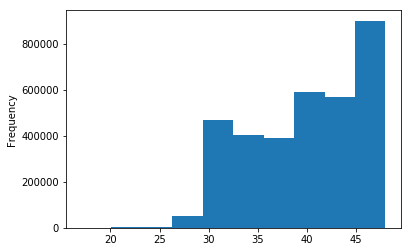

In [21]:
data['injury age'].plot(kind = 'hist')

In [25]:
data['injury age'].std()

5.6471326712806365

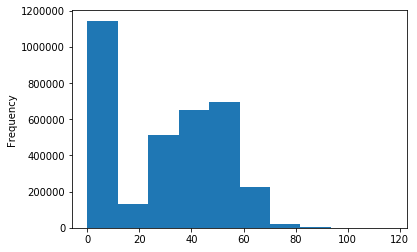

In [30]:
data['Age at Injury'].plot(kind = 'hist')

In [26]:
invalid_list = ['Claim Type','Claim Identifier','Hearing Count','Highest Process','Current Claim Status','Assembly Date','ANCR Date','Alternative Dispute Resolution','Closed Count',
               'Age at Injury', 'Accident Date','Birth Year', 'WCIO Part Of Body Description','WCIO Nature of Injury Description', 'WCIO Cause of Injury Description','Interval Assembled to ANCR','Accident Date year', 'Birth Years','Average Weekly Wage']

In [27]:
valid_columns =valid_columns[~(valid_columns.isin(invalid_list))]

In [28]:
(valid_columns)

Index(['District Name', 'Claim Injury Type', 'WCIO Part Of Body Code',
       'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code', 'Gender',
       'Zip Code', 'Medical Fee Region', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'Accident', 'Occupational Disease',
       'County of Injury'],
      dtype='object')

In [29]:
data = data[valid_columns]

In [30]:
data.columns

Index(['District Name', 'Claim Injury Type', 'WCIO Part Of Body Code',
       'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code', 'Gender',
       'Zip Code', 'Medical Fee Region', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'Accident', 'Occupational Disease',
       'County of Injury'],
      dtype='object')

In [98]:
#data['Average Weekly Wage'].median()

In [31]:
data.head()

,District Name,Claim Injury Type,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,Gender,Zip Code,Medical Fee Region,Attorney/Representative,Carrier Name,Carrier Type,Accident,Occupational Disease,County of Injury
0,BUFFALO,PPD NSL,42,59,75,M,14201,II,Y,UTICA MUTUAL INSURANCE CO,1A. PRIVATE,Y,N,ERIE
1,ALBANY,PPD NSL,20,52,75,F,12205,II,Y,STATE INSURANCE FUND,2A. SIF,Y,N,ALBANY
2,NYC,PPD NSL,42,52,55,F,10701,III,Y,STATE INSURANCE FUND,2A. SIF,Y,N,WESTCHESTER
3,NYC,PPD NSL,42,59,99,M,11355,IV,Y,CHARTER OAK FIRE INS CO,1A. PRIVATE,Y,N,QUEENS
4,NYC,PPD NSL,42,52,56,F,11735,IV,Y,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,Y,N,NASSAU


In [33]:
round(data['Accident'].value_counts()/data['Accident'].shape[0] * 100, 2)
#this is interesting some injuries were not accident? We will have to look into this further we may uncover something intersting

Y    98.18
N     1.82
Name: Accident, dtype: float64

### If the injury is not an accident it very likely it will end up in litigation 

In [12]:
(data[data['Claim Injury Type'] == 'NON-COMP']['Attorney/Representative']).value_counts()

N    1034287
Y      95550
Name: Attorney/Representative, dtype: int64

In [147]:
(data[data['Accident'] == 'N']['Attorney/Representative']).value_counts()

Y    47167
N    14574
Name: Attorney/Representative, dtype: int64

In [13]:
data['Occupational Disease'].value_counts()

N    3345781
Y      61829
Name: Occupational Disease, dtype: int64

In [52]:
(data[data['Occupational Disease'] == 'N']['Attorney/Representative']).value_counts()

N    2287822
Y    1033689
Name: Attorney/Representative, dtype: int64

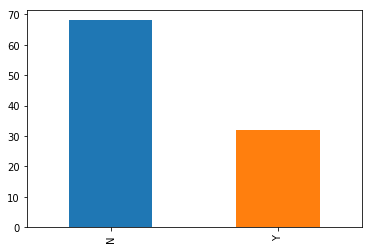

In [34]:
# Let's now build our model, beofre that let's see what the distribution of our target variable is like
round(data['Attorney/Representative'].value_counts()/data['Attorney/Representative'].shape[0]*100, 2).plot(kind = 'bar')
# This is no evenly distributed! We will use precsion, recall and F1 score as our performance metrics

In [10]:
#data['Average Weekly Wage'].unique().sum()

In [11]:
#Before that let's clean our data set
#We use 26 attribtues and we will convert them into categorical vairable
#we won't use dummy variable becauase there will be attribute explosion 
(data['Average Weekly Wage'].replace('\$','',regex = True).astype(float)).nunique()

#replcae $ with number

210851

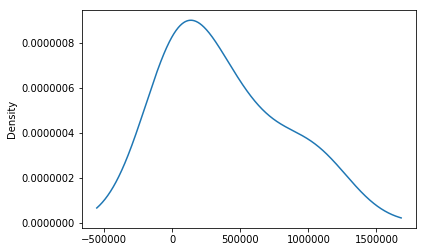

In [293]:
data['Claim Injury Type'].value_counts().plot(kind='kde')

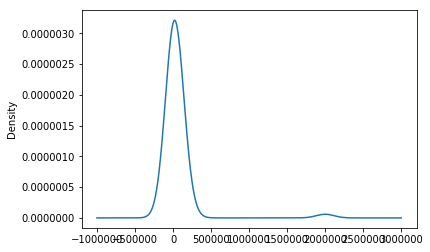

In [294]:
data['WCIO Part Of Body Code'].value_counts().plot(kind='kde')

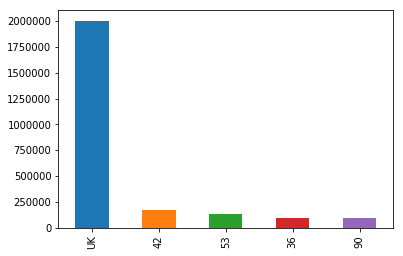

In [28]:
data['WCIO Part Of Body Code'].value_counts().head(5).plot(kind='bar')

In [31]:
valid_columns = data.columns[~data.columns.isin(invalid_list)]
data.columns

Index(['Claim Identifier', 'Claim Type', 'District Name',
       'Average Weekly Wage', 'Current Claim Status', 'Claim Injury Type',
       'Age at Injury', 'Assembly Date', 'Accident Date', 'ANCR Date',
       'Controverted Date', 'Section 32 Date', 'PPD Scheduled Loss Date',
       'PPD Non-Scheduled Loss Date', 'PTD Date', 'First Appeal Date',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'OIICS Part Of Body Code', 'OIICS Part Of Body Description',
       'OIICS Nature of Injury Code', 'OIICS Nature of Injury Description',
       'OIICS Injury Source Code', 'OIICS Injury Source Description',
       'OIICS Event Exposure Code', 'OIICS Event Exposure Description',
       'OIICS Secondary Source Code', 'OIICS Secondary Source Description',
       'Alternative Dispute Resolution', 'Gender', 'Birth Year', 'Zip Code',


In [14]:
data['County of Injury'].value_counts().head(10)

NEW YORK       321606
QUEENS         298281
SUFFOLK        287631
KINGS          263093
NASSAU         219034
ERIE           200803
BRONX          177248
MONROE         145959
WESTCHESTER    138545
ONONDAGA       103178
Name: County of Injury, dtype: int64

In [281]:
data_1.columns

Index(['Claim Identifier', 'Claim Type', 'District Name',
       'Average Weekly Wage', 'Current Claim Status', 'Claim Injury Type',
       'Age at Injury', 'Assembly Date', 'Accident Date', 'ANCR Date',
       'Controverted Date', 'Section 32 Date', 'PPD Scheduled Loss Date',
       'PPD Non-Scheduled Loss Date', 'PTD Date', 'First Appeal Date',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'OIICS Part Of Body Code', 'OIICS Part Of Body Description',
       'OIICS Nature of Injury Code', 'OIICS Nature of Injury Description',
       'OIICS Injury Source Code', 'OIICS Injury Source Description',
       'OIICS Event Exposure Code', 'OIICS Event Exposure Description',
       'OIICS Secondary Source Code', 'OIICS Secondary Source Description',
       'Alternative Dispute Resolution', 'Gender', 'Birth Year', 'Zip Code',


In [288]:
(data_1[data_1['Closed Count'] > 1]['Attorney/Representative']).value_counts()

Y    809937
N    134620
Name: Attorney/Representative, dtype: int64

In [290]:
data_1.duplicated().sum()

0

In [282]:
data_1['Hearing Count'].value_counts()

0     2125053
1      471201
2      234736
3      150236
4      103242
5       74864
6       56315
7       43182
8       33182
9       25614
10      19874
11      15738
12      11927
13       9240
14       7385
15       5767
16       4516
17       3505
18       2715
19       2107
20       1693
21       1204
22        961
23        772
24        605
25        448
26        335
27        270
28        207
29        140
30        122
31        108
32         66
33         63
34         39
35         39
37         28
36         26
38         14
39         13
43         11
40         11
42          7
45          7
41          6
46          3
48          3
44          2
47          2
51          1
55          1
59          1
50          1
49          1
61          1
Name: Hearing Count, dtype: int64

In [37]:
data.head()

,District Name,Claim Injury Type,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,Gender,Zip Code,Medical Fee Region,Attorney/Representative,Carrier Name,Carrier Type,Accident,Occupational Disease,County of Injury
0,BUFFALO,PPD NSL,42,59,75,M,14201,II,Y,UTICA MUTUAL INSURANCE CO,1A. PRIVATE,Y,N,ERIE
1,ALBANY,PPD NSL,20,52,75,F,12205,II,Y,STATE INSURANCE FUND,2A. SIF,Y,N,ALBANY
2,NYC,PPD NSL,42,52,55,F,10701,III,Y,STATE INSURANCE FUND,2A. SIF,Y,N,WESTCHESTER
3,NYC,PPD NSL,42,59,99,M,11355,IV,Y,CHARTER OAK FIRE INS CO,1A. PRIVATE,Y,N,QUEENS
4,NYC,PPD NSL,42,52,56,F,11735,IV,Y,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,Y,N,NASSAU


In [59]:

categorical_col = data[['District Name','Gender',
                       'Medical Fee Region', 'Carrier Type', 'Occupational Disease','Accident',
                        'County of Injury','Attorney/Representative','Claim Injury Type','Carrier Name' ]]

In [60]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_encoded = categorical_col.apply(lb_make.fit_transform)

In [61]:
df_encoded.head()

,District Name,Gender,Medical Fee Region,Carrier Type,Occupational Disease,Accident,County of Injury,Attorney/Representative,Claim Injury Type,Carrier Name
0,2,1,1,0,0,1,14,1,4,1645
1,0,0,1,1,0,1,0,1,4,1488
2,5,0,2,1,0,1,60,1,4,1488
3,5,1,3,0,0,1,40,1,4,283
4,5,0,3,0,0,1,29,1,4,1407


In [62]:
data_new_col = data.columns[~data.columns.isin(categorical_col.columns)]

In [63]:
data_new = data[data_new_col]

In [64]:
data_new.head()

,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,Zip Code
0,42,59,75,14201
1,20,52,75,12205
2,42,52,55,10701
3,42,59,99,11355
4,42,52,56,11735


In [65]:
data_training = pd.concat([data_new, df_encoded], axis = 1)

In [67]:
data_training.shape

(3383252, 14)

In [70]:
len(data_training.columns)

14

In [71]:
data_training.columns

Index(['WCIO Part Of Body Code', 'WCIO Nature of Injury Code',
       'WCIO Cause of Injury Code', 'Zip Code', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type', 'Occupational Disease',
       'Accident', 'County of Injury', 'Attorney/Representative',
       'Claim Injury Type', 'Carrier Name'],
      dtype='object')

In [92]:
data_training['WCIO Part Of Body Code'] = data_training['WCIO Part Of Body Code'].replace('UK',0)

In [94]:
data_training['WCIO Nature of Injury Code'] = data_training['WCIO Nature of Injury Code'].replace('UK',0)

In [95]:
data_training['WCIO Cause of Injury Code'] = data_training['WCIO Cause of Injury Code'].replace('UK',0)

In [117]:
data_training = data_training[['WCIO Part Of Body Code', 'WCIO Nature of Injury Code',
       'WCIO Cause of Injury Code',  'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type', 'Occupational Disease',
       'Accident', 'County of Injury','Claim Injury Type','Attorney/Representative']]

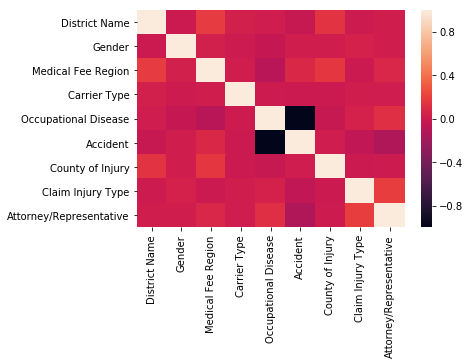

In [97]:
import seaborn as sns
sns.heatmap(data_training.corr())

In [84]:
(categorical_col.columns)

Index(['WCIO Part Of Body Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'Gender', 'Medical Fee Region',
       'Carrier Type', 'Occupational Disease', 'Accident', 'County of Injury',
       'injury age', 'Attorney/Representative'],
      dtype='object')

In [118]:
#Wohooo! We now build over classifer 

X = data_training.iloc[:,:-1]
y = data_training.iloc[:,-1]


In [119]:
data_training.head()

,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,District Name,Gender,Medical Fee Region,Carrier Type,Occupational Disease,Accident,County of Injury,Claim Injury Type,Attorney/Representative
0,42,59,75,2,1,1,0,0,1,14,4,1
1,20,52,75,0,0,1,1,0,1,0,4,1
2,42,52,55,5,0,2,1,0,1,60,4,1
3,42,59,99,5,1,3,0,0,1,40,4,1
4,42,52,56,5,0,3,0,0,1,29,4,1


In [289]:
data_training.columns

Index(['WCIO Part Of Body Code', 'WCIO Nature of Injury Code',
       'WCIO Cause of Injury Code', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type', 'Occupational Disease',
       'Accident', 'County of Injury', 'Claim Injury Type',
       'Attorney/Representative'],
      dtype='object')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


In [121]:
y_test.value_counts()

0    1842396
1     864206
Name: Attorney/Representative, dtype: int64

### sampling method 

In [142]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (676650, 11) (676650,)
Upsampled shape: (920000, 11) (920000,)
SMOTE sample shape: (920000, 11) (920000,)
Downsampled shape: (433300, 11) (433300,)


In [143]:
from sklearn.model_selection import cross_val_score
rand_sm = RandomForestClassifier(class_weight = 'balanced')
#result_rand = cross_val_score(rand, X_train_u, y_train_u, cv=5, scoring='f1')
#result_DT = cross_val_score(clf, X_train_u, y_train_u, cv=5, scoring='f1')

In [144]:
print('upsmaple'+ str(cross_val_score(rand_sm, X_train_u, y_train_u, cv=3, scoring='roc_auc')))

upsmaple[0.90294299 0.90246074 0.90218712]


In [145]:
print('smote'+ str(cross_val_score(rand_sm, x_train_sm, y_train_sm, cv=3, scoring='roc_auc')))

smote[0.87097065 0.90199962 0.9185297 ]


In [146]:
print('downsample'+ str(cross_val_score(rand_sm, X_train_d, y_train_d, cv=3, scoring='roc_auc')))

downsample[0.88232303 0.88239281 0.88141739]


In [147]:
print('random forest params'+ str(cross_val_score(rand, X_train, y_train, cv=3, scoring='roc_auc')))

random forest params[0.87310816 0.87362585 0.87298582]


## prediction 

In [122]:
X_train.dtypes

WCIO Part Of Body Code        object
WCIO Nature of Injury Code    object
WCIO Cause of Injury Code     object
District Name                  int32
Gender                         int32
Medical Fee Region             int32
Carrier Type                   int32
Occupational Disease           int32
Accident                       int32
County of Injury               int32
Claim Injury Type              int32
dtype: object

In [148]:
clf = DecisionTreeClassifier()
clf.fit(x_train_sm, y_train_sm)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
cross_val_score(clf, x_train_sm, y_train_sm, cv=3, scoring='roc_auc')

array([0.82526122, 0.87133578, 0.89537997])

In [151]:
y_pred_dt = clf.predict(X_test)

In [132]:
print("F1 for DT :" + str(f1_score(y_test, y_pred_dt,average='weighted')))
print("Precison for DT :" + str(precision_score(y_test, y_pred_dt,average='weighted')))
print("Recall for DT :" + str(recall_score(y_test, y_pred_dt,average='weighted'))  )

F1 for DT :0.6519522382642357
Precison for DT :0.678888991888443
Recall for DT :0.641169259462603


In [152]:
importances = clf.feature_importances_
feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (feature_importance)

[(0.6579419134794546, 'Claim Injury Type'), (0.10201408588380362, 'WCIO Cause of Injury Code'), (0.04874718467867213, 'Medical Fee Region'), (0.04113352901774244, 'County of Injury'), (0.039127358899089935, 'Carrier Type'), (0.038561492998681744, 'WCIO Part Of Body Code'), (0.025541892307568273, 'WCIO Nature of Injury Code'), (0.024032810803647744, 'District Name'), (0.019283663315646748, 'Gender'), (0.0019061649859504048, 'Accident'), (0.0017099036297423022, 'Occupational Disease')]


In [153]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7654938053011692

## Default Random Forest 

In [154]:
rand = RandomForestClassifier()
rand.fit(x_train_sm, y_train_sm)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
cross_val_score(rand, x_train_sm, y_train_sm, cv=3, scoring='roc_auc')

array([0.87066283, 0.90214053, 0.91842279])

In [156]:
y_pred_rf = rand.predict(X_test)

In [108]:
print("F1 for rf :" + str(f1_score(y_test, y_pred_rf, average='weighted')))
print("Precison for rf :" + str(precision_score(y_test, y_pred_rf,average='weighted')))
print("Recall for rf :" + str(recall_score(y_test, y_pred_rf,average='weighted'))  )

F1 for rf :0.6677500862377995
Precison for rf :0.6905947137225025
Recall for rf :0.6580727421320165


In [157]:
importances = rand.feature_importances_
feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (feature_importance)

[(0.6346637023338055, 'Claim Injury Type'), (0.060085019255110964, 'WCIO Cause of Injury Code'), (0.05644186585846175, 'WCIO Part Of Body Code'), (0.04959182971769573, 'County of Injury'), (0.04486508230519304, 'Carrier Type'), (0.03874782008892158, 'WCIO Nature of Injury Code'), (0.038546659682542395, 'Medical Fee Region'), (0.02971336305497809, 'Gender'), (0.02571257453499603, 'District Name'), (0.011580841519588379, 'Accident'), (0.01005124164870635, 'Occupational Disease')]


In [ ]:
## optimize it

In [268]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 150, 200, 250, 300,500]
# Number of features to consider at every split
max_features = ['sqrt', 10, 5, 3]
# Maximum number of levels in tree
max_depth = [100, 200, 300, 400, 500,1000]

# Minimum number of samples required to split a node
min_samples_split = [100000, 200000, 300000]
# Minimum number of samples required at each leaf node
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }

In [269]:
rf_random = RandomizedSearchCV(estimator = rand, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42)

In [270]:
rf_random.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200 
[CV]  n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200, total=  36.4s
[CV] n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200, total=  33.4s
[CV] n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200 
[CV]  n_estimators=100, min_samples_split=300000, max_features=10, max_depth=200, total=  33.4s
[CV] n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500 
[CV]  n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500, total=  28.2s
[CV] n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500 
[CV]  n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500, total=  31.1s
[CV] n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500 
[CV]  n_estimators=100, min_samples_split=200000, max_features=3, max_depth=500, total=  36.2s
[CV] n_estimators=100, min_samples_split=100000, max_features=3, max_depth=400 
[CV]  n_estimators=100, min_samples_split=100000, max_features=3, max_depth=400, total=  47.5s
[CV] n_estimators=100, min_

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300, 500], 'max_features': ['sqrt', 10, 5, 3], 'max_depth': [100, 200, 300, 400, 500, 1000], 'min_samples_split': [100000, 200000, 300000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [271]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=400, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100000,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [272]:
y_pred_rf_opt = rf_random.predict(X_test)

In [124]:
print("F1 for rf_opt :" + str(f1_score(y_test, y_pred_rf_opt, average='weighted')))
print("Precison for rf_opt :" + str(precision_score(y_test, y_pred_rf_opt,average='weighted')))
print("Recall for rf_opt :" + str(recall_score(y_test, y_pred_rf_opt,average='weighted'))  )

F1 for rf_opt :0.6558887693895897
Precison for rf_opt :0.6941245690421443
Recall for rf_opt :0.6441822624826258


In [179]:
def setval(y_pred_):
    for i in range(len(y_pred)):
        if(y_pred_[i][0] >= 0.6) :
            y_pred_[i][0] = 1
            y_pred_[i][1] = 0
        else :
            y_pred_[i][0] = 0
            y_pred_[i][1] = 1
    return y_pred_

## AUC  for RF

In [183]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_randomForest_test = round(auc(false_positive_rate, true_positive_rate),2)
roc_auc_randomForest_test

0.78

0.6349172190579624

In [273]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf_opt)
roc_auc_rf_opt_test = round(auc(false_positive_rate, true_positive_rate),2)
roc_auc_rf_opt_test

0.77

In [184]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc_dt_test = round(auc(false_positive_rate, true_positive_rate),2)
roc_auc_dt_test

0.77

### AUC training 

In [186]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, clf.predict(x_train_sm))
roc_auc_dt_train = round(auc(false_positive_rate, true_positive_rate),2)
roc_auc_dt_train

0.85

In [192]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, rand.predict(x_train_sm))
roc_auc_rand_train = round(auc(false_positive_rate, true_positive_rate),2)
roc_auc_rand

0.84

In [193]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, rf_random.predict(x_train_sm))
roc_auc_rf_opt_train = round(auc(false_positive_rate, true_positive_rate), 2)
roc_auc_rf_opt

0.79

In [ ]:
# y_pred = rf_random.predict(X_test)

In [135]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## ROC for training 

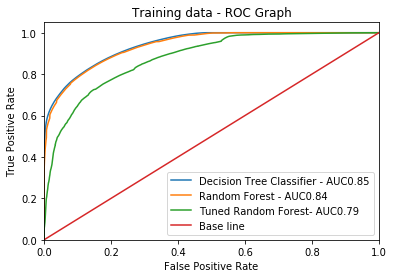

In [194]:
# Create ROC Graph
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_train_sm, rand.predict_proba(x_train_sm)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train_sm, clf.predict_proba(x_train_sm)[:,1])
rfop_fpr, rfop_tpr, rfop_thresholds = roc_curve(y_train_sm, rf_random.predict_proba(x_train_sm)[:,1])
#lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])

plt.figure()

# Plot Decions Tree ROC
plt.plot(rf_fpr, rf_tpr, label='Decision Tree Classifier - AUC{}'.format(roc_auc_dt_train))

# Plot Random ROC
plt.plot(fpr, tpr, label='Random Forest - AUC{}'.format(roc_auc_rand_train))

# Plot Tuned Random ROC
plt.plot(rfop_fpr, rfop_tpr, label='Tuned Random Forest- AUC{}'.format(roc_auc_rf_opt_train))


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base line')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training data - ROC Graph')
plt.legend(loc="lower right")
plt.show()

### ROC test

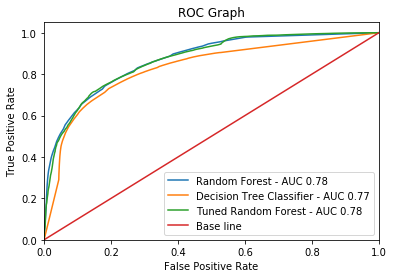

In [185]:
# Create ROC Graph
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, rand.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
rfop_fpr, rfop_tpr, rfop_thresholds = roc_curve(y_test, rf_random.predict_proba(X_test)[:,1])

#lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Random Forest - AUC {}'.format(roc_auc_randomForest_test) )

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Decision Tree Classifier - AUC {}'.format(roc_auc_dt_test) )

# Plot Tuned Random ROC
plt.plot(rfop_fpr, rfop_tpr, label='Tuned Random Forest - AUC {}'.format(roc_auc_rf_opt_test) )

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base line')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### optimize 

In [140]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [143]:
importances = rf_random.best_estimator_.feature_importances_
feature_importance = sorted(zip(importances, list(X_test)), reverse=True)
print (feature_importance)

[(0.5399107150767449, 'injury age'), (0.1686578867250067, 'WCIO Nature of Injury Code'), (0.13038492738235224, 'WCIO Part Of Body Code'), (0.09943910422090863, 'Medical Fee Region'), (0.03821805627477889, 'Gender'), (0.019353171790842307, 'Carrier Type'), (0.004036138529366162, 'County of Injury'), (0.0, 'Occupational Disease')]


In [189]:
output = pd.DataFrame( columns ={'Claim Identifier' ,'WCIO Part Of Body Code','WCIO Nature of Injury Code','Gender','Medical Fee Region','Carrier Type','Occupational Disease','County of Injury','probability'})

In [206]:
output['Carrier Type'] =['1A. PRIVATE', '2.SIF', '1A. PRIVATE']

In [207]:
output

,WCIO Part Of Body Code,probability,Gender,County of Injury,Medical Fee Region,Claim Identifier,WCIO Nature of Injury Code,Occupational Disease,Carrier Type
0,59,0.92,1,ERIE,2,4037088,30,N,1A. PRIVATE
1,52,0.49,0,ALBANY,2,4037091,25,N,2.SIF
2,52,0.63,1,QUEENS,3,4037093,25,N,1A. PRIVATE


In [201]:
X_test.columns

Index(['WCIO Part Of Body Code', 'WCIO Nature of Injury Code',
       'WCIO Cause of Injury Code', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type', 'Occupational Disease',
       'Accident', 'County of Injury', 'Claim Injury Type'],
      dtype='object')

In [162]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=500, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50000, min_samples_split=100000,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

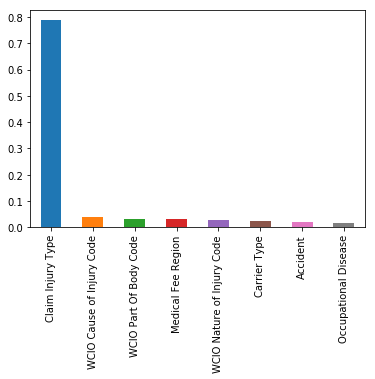

In [195]:
feat_importances = pd.Series(rf_random.best_estimator_.feature_importances_, index=X_test.columns)
feat_importances.nlargest(8).plot(kind='bar')

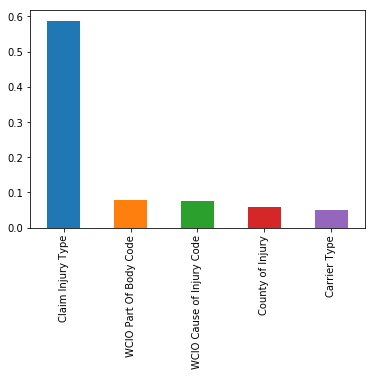

In [141]:
feat_importances = pd.Series(rand.feature_importances_, index=X_test.columns)
feat_importances.nlargest(5).plot(kind='bar')

In [251]:
import pdpbox
from pdpbox import pdp
from partial_dependence import PartialDependenceExplainer

In [198]:
import partial_dependence as pdp_plot
#pdp_pedi_insul = pdp.pdp_isolate(my_model, data, ['injury age'], feature='injury age')
#pdp.pdp_interact_plot(my_model, ['injury age'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

In [199]:
df_test = X_test
model = rf_random
labels_name = ['Attorney/Representative']
label_focus = labels_name[0]

In [200]:
pdp_wrkc = pdp_plot.PartialDependence(df_test,model,labels_name,label_focus)

KeyboardInterrupt: 

In [217]:
y_test.value_counts()

0    1842396
1     864206
Name: Attorney/Representative, dtype: int64

In [181]:
injury = pd.DataFrame(X_test['injury age'])

In [164]:
predict = rf_random.predict_proba(X_test)[:,:1]

In [188]:
pred_df = pd.concat([injury, pd.DataFrame(predict)], axis = 1)

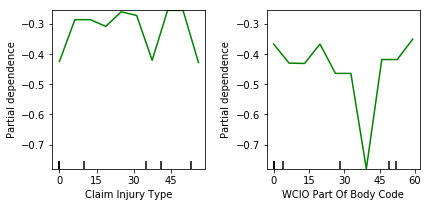

In [212]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

my_model = GradientBoostingClassifier()
# fit the model as usual
my_model.fit(X_train, y_train)

my_plots = plot_partial_dependence(my_model,       
                                   features = [0,1], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['Claim Injury Type','WCIO Part Of Body Code'], # labels on graphs
                                   grid_resolution=10) 

In [218]:
from pdpbox import pdp, get_dataset, info_plots

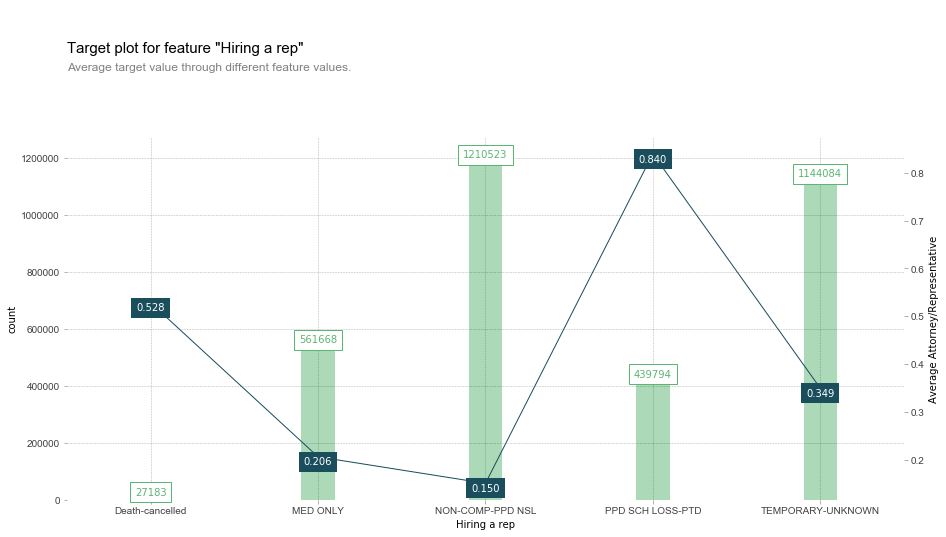

In [247]:
fig, axes, summary_df = info_plots.target_plot(
    df=data_training, feature='Claim Injury Type', feature_name='Hiring a rep', target='Attorney/Representative'
)
_= axes['bar_ax'].set_xticklabels(['Death-cancelled', 'MED ONLY','NON-COMP-PPD NSL','PPD SCH LOSS-PTD','TEMPORARY-UNKNOWN'])

In [242]:
summary_df

,x,display_column,value_lower,value_upper,count,Attorney/Representative
0,0,"[0, 2)",0.0,2.0,27183,0.528198
1,1,"[2, 3)",2.0,3.0,561668,0.205670
2,2,"[3, 5)",3.0,5.0,1210523,0.150148
3,3,"[5, 7)",5.0,7.0,439794,0.839952
4,4,"[7, 8]",7.0,8.0,1144084,0.349464


In [244]:
data_training['Claim Injury Type'].value_counts()

3    1122301
7     911497
2     561668
5     435451
8     232587
4      88222
0      21490
1       5693
6       4343
Name: Claim Injury Type, dtype: int64

In [245]:
data['Claim Injury Type'].value_counts()

NON-COMP        1122301
TEMPORARY        911497
MED ONLY         561668
PPD SCH LOSS     435451
UNKNOWN          232587
PPD NSL           88222
CANCELLED         21490
DEATH              5693
PTD                4343
Name: Claim Injury Type, dtype: int64

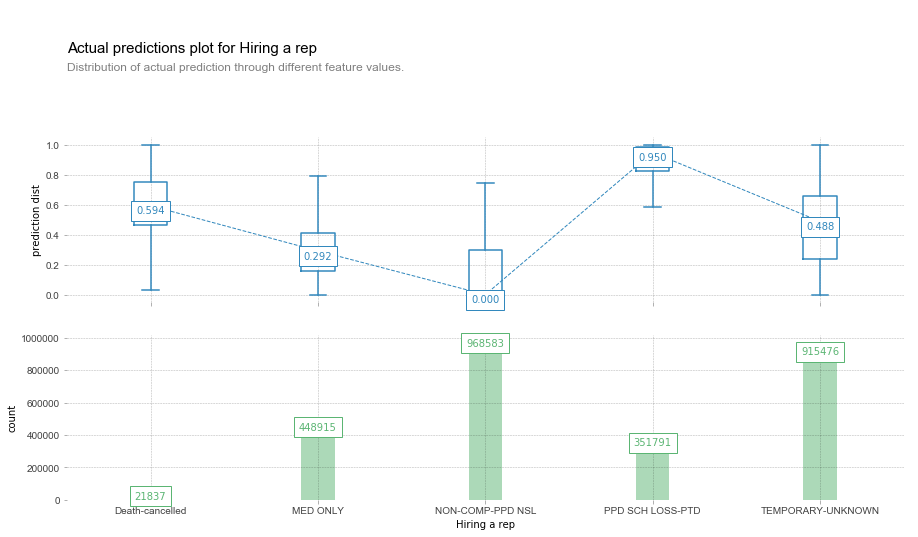

In [266]:
fig, axes, summary_df = info_plots.actual_plot(
    model=rand, X=X_test, feature='Claim Injury Type', feature_name='Hiring a rep', predict_kwds={}
)
_= axes['bar_ax'].set_xticklabels(['Death-cancelled', 'MED ONLY','NON-COMP-PPD NSL','PPD SCH LOSS-PTD','TEMPORARY-UNKNOWN'])

In [254]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0, 2)",0.0,2.0,"[0, 11.11)",0.00,11.11,21837,0.462698,0.593642,0.753644
1,1,"[2, 3)",2.0,3.0,"[11.11, 44.44)",11.11,44.44,448915,0.160804,0.292142,0.413133
2,2,"[3, 5)",3.0,5.0,"[44.44, 55.56)",44.44,55.56,968583,0.000000,0.000000,0.299696
3,3,"[5, 7)",5.0,7.0,"[55.56, 88.89)",55.56,88.89,351791,0.825853,0.949615,0.986376
4,4,"[7, 8]",7.0,8.0,"[88.89, 100]",88.89,100.00,915476,0.240685,0.488311,0.657337


In [267]:
pdp_fare = pdp.pdp_isolate(
    model=rand, dataset=data_training, model_features=X_train.columns, feature='Claim Injury Type'
)
_= axes['bar_ax'].set_xticklabels(['Death-cancelled', 'MED ONLY','NON-COMP-PPD NSL','PPD SCH LOSS-PTD','TEMPORARY-UNKNOWN'])

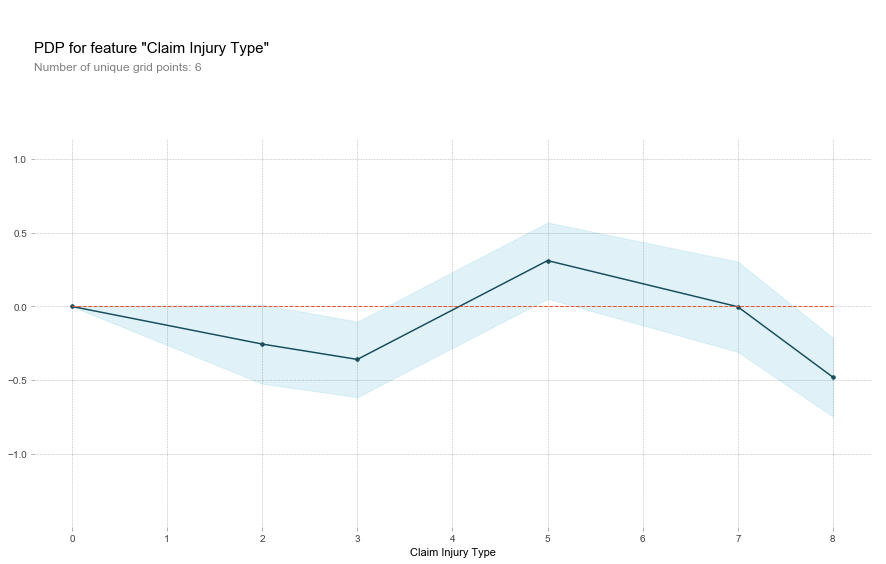

In [274]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Claim Injury Type')

In [278]:
pdp_body_part = pdp.pdp_isolate(
    model=rand, dataset=data_training, model_features=X_train.columns, feature='WCIO Part Of Body Code'
)

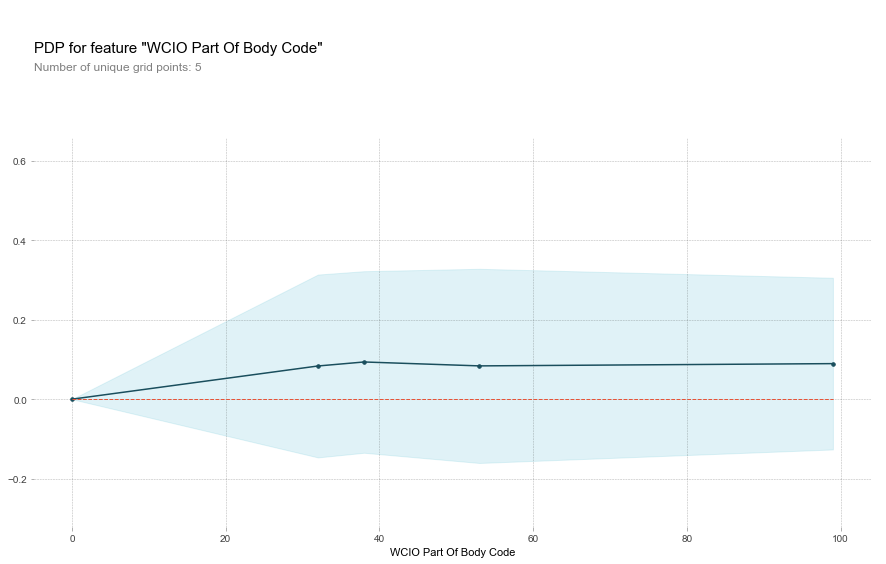

In [279]:
fig, axes = pdp.pdp_plot(pdp_body_part, 'WCIO Part Of Body Code')

In [277]:
(data_training['WCIO Part Of Body Code'].nunique)

<bound method IndexOpsMixin.nunique of 0          42
1          20
2          42
3          42
4          42
5          90
6          42
7          65
8          90
9          42
10         90
11         90
12          0
13         20
14         33
15         90
16         42
17         18
18         33
19         90
20         20
21         42
22         42
23         90
24         19
25         38
26         42
27         42
28         41
29         90
           ..
3407580    30
3407581    42
3407582    13
3407583    61
3407584    31
3407585    66
3407586    53
3407587    36
3407588    90
3407589    61
3407590    30
3407591    14
3407592    42
3407593    32
3407594    42
3407595    14
3407596    37
3407597    55
3407598     0
3407599     0
3407600    19
3407601    61
3407602     0
3407603    42
3407604    19
3407605    22
3407606     0
3407607    44
3407608    55
3407609    34
Name: WCIO Part Of Body Code, Length: 3383252, dtype: int32>

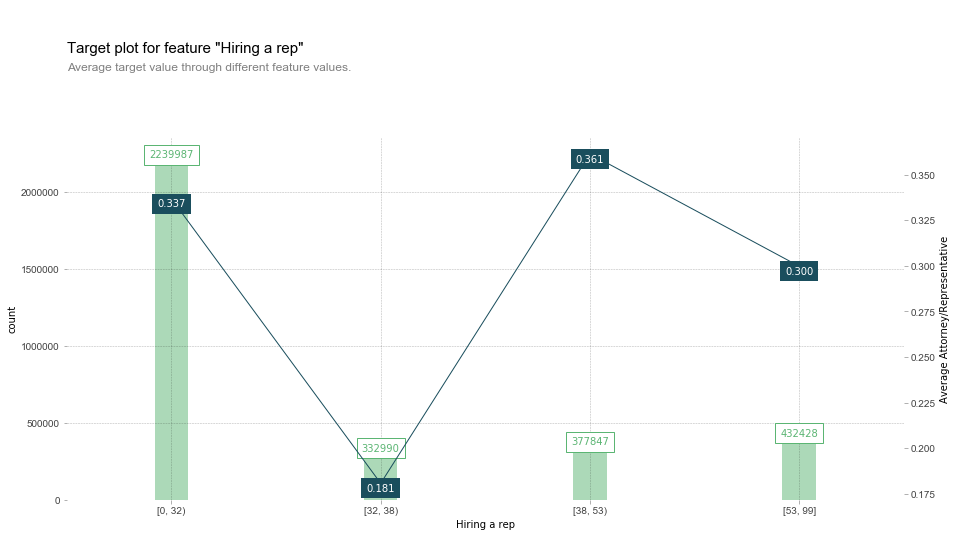

In [264]:
fig, axes, summary_df = info_plots.target_plot(
    df=data_training, feature='WCIO Part Of Body Code', feature_name='Hiring a rep', target='Attorney/Representative'
)

In [212]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("F1 for logistic regression :" + str(f1_score(y_test, y_pred)))
print("Precison logistic regression :" + str(precision_score(y_test, y_pred)))
print("Recall for logistic regression :" + str(recall_score(y_test, y_pred))  )

F1 for logistic regression :0.22453529990982116
Precison logistic regression :0.5085202928238568
Recall for logistic regression :0.1440757033602904


### XG Boost 

In [213]:
import xgboost as xgb

In [115]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
predictions = gbm.predict(X_test)

In [ ]:
print("F1 for logistic regression :" + str(f1_score(y_test, y_pred)))
print("Precison logistic regression :" + str(precision_score(y_test, y_pred)))
print("Recall for logistic regression :" + str(recall_score(y_test, y_pred))  )

## Data Insights


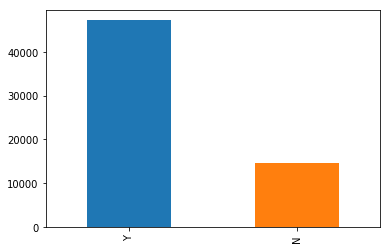

In [216]:
(data[data['Accident'] == 'N']['Attorney/Representative']).value_counts().plot(kind = 'bar')

In [212]:
attr_cnt = (data[data['Accident'] == 'N']['Attorney/Representative']).value_counts().tolist()

In [223]:
(data[data['Gender'] == 'F']['Attorney/Representative']).value_counts()

N    908566
Y    389982
Name: Attorney/Representative, dtype: int64

In [220]:
data['Gender'].value_counts()

M    2043434
F    1298548
U      41270
Name: Gender, dtype: int64